In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import seaborn as sns

In [6]:
train = pd.read_csv('/content/MocncBR9Tfi846nN9DRWYw_3a7dd09e8c9b420081f46991b26484a1_train (1).csv')
test = pd.read_csv('/content/sv53wVdlQMOy8zpB-LM71A_0f56b8d1863949ec83c6fe4c76253aa1_test.csv')

In [7]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
train.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Dooley, Mr. Patrick",male,347082,G6,S
freq,1,577,7,4,644


In [11]:
train[['Pclass' , 'Survived']].groupby(['Pclass'] , as_index=False).mean().sort_values(by='Survived' , ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [12]:
train[['Sex' , 'Survived']].groupby(['Sex'] , as_index=False).mean().sort_values(by='Survived' , ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [13]:
train[['SibSp' , 'Survived']].groupby(['SibSp'] , as_index=False).mean().sort_values(by='Survived' , ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [14]:
train[['Parch' , 'Survived']].groupby(['Parch'] , as_index=False).mean().sort_values(by='Survived' , ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


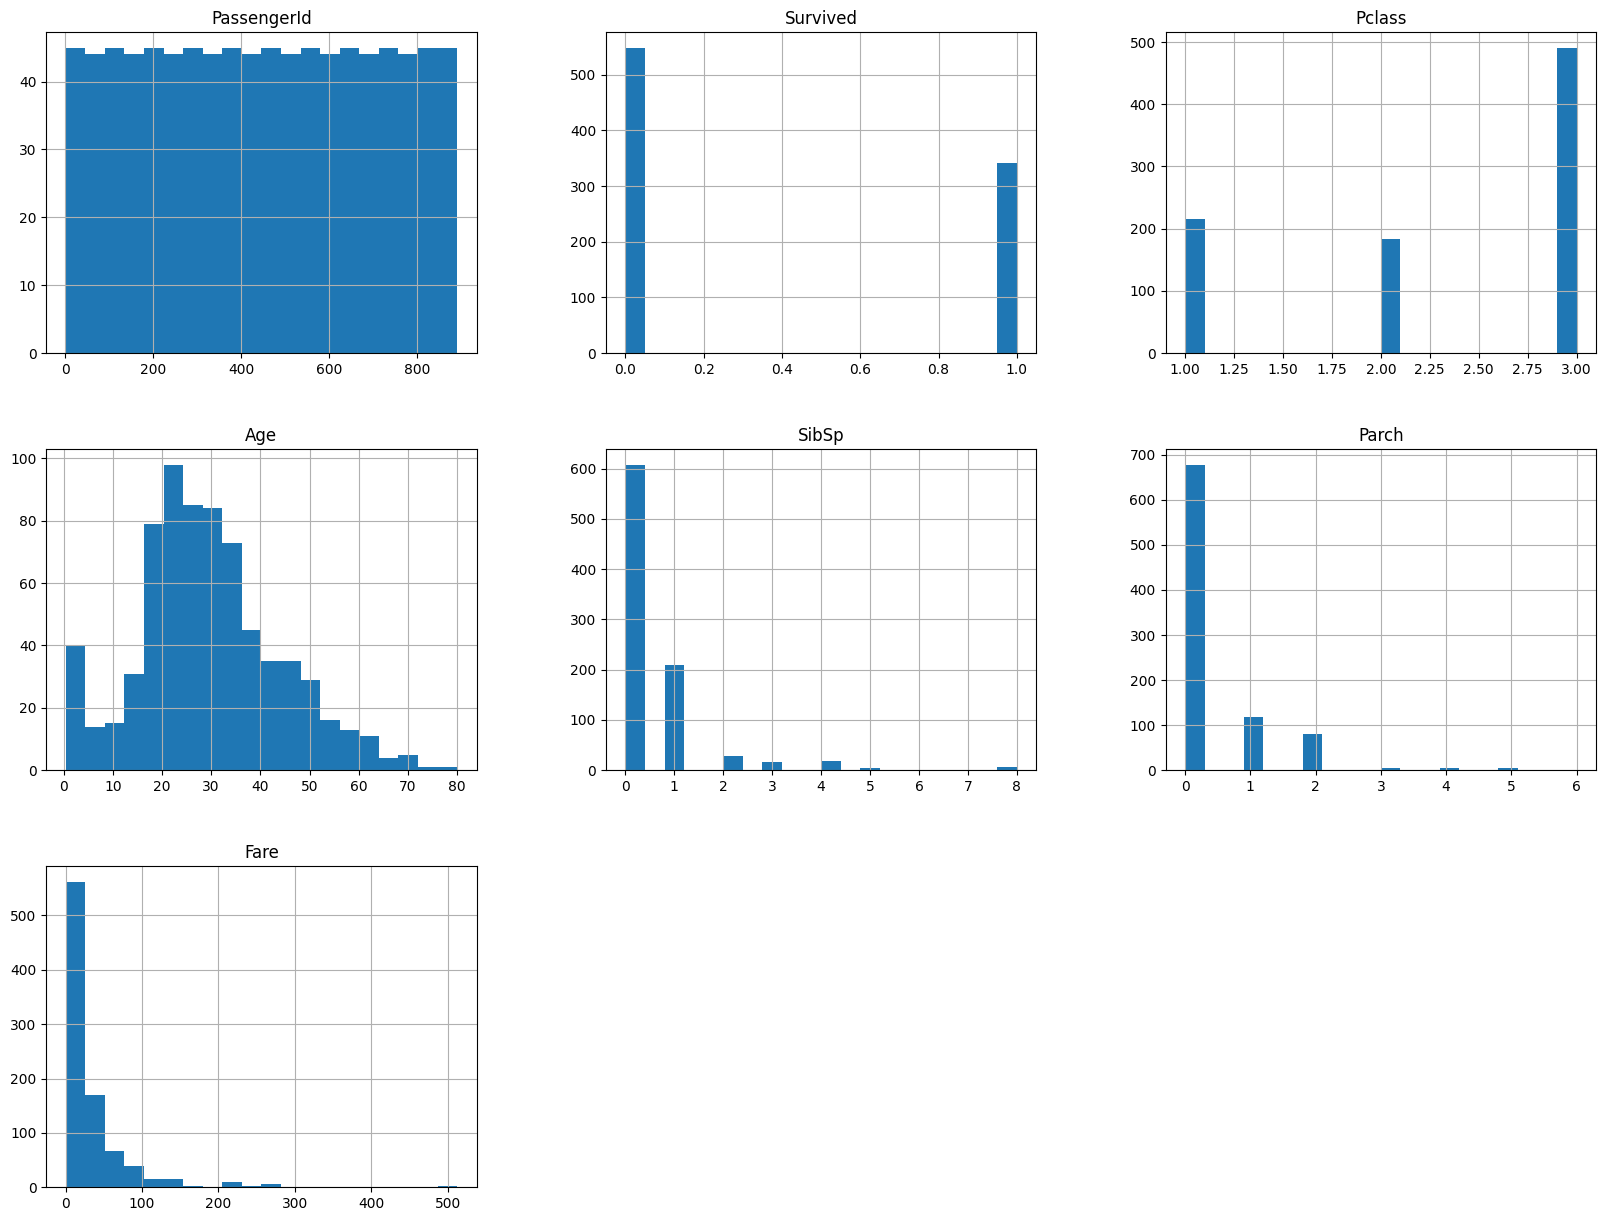

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt
train.hist(bins=20 , figsize=(20,15))
plt.show()

In [16]:
train = train.drop(['Ticket' , 'Cabin'], axis=1, errors='ignore')
test = test.drop(['Ticket' , 'Cabin'], axis=1, errors='ignore')
combine = [train , test]

In [17]:
combine = [train , test]

In [18]:
for dataset in combine:
  dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.' , expand=False)

pd.crosstab(train['Title'] , train['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [19]:
for dataset in combine:
  dataset['Title'] = dataset['Title'].replace(['Lady' , 'Countess' , 'Capt' , 'Col' , 'Don' , 'Dr' , 'Major' , 'Rev' , 'Sir' , 'Jonkheer' , 'Dona'] , 'Rare')
  dataset['Title'] = dataset['Title'].replace('Mlle' , 'Miss')
  dataset['Title'] = dataset['Title'].replace('Ms' , 'Miss')
  dataset['Title'] = dataset['Title'].replace('Mme' , 'Mrs')

train[['Title' , 'Survived']].groupby(['Title'] , as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


In [20]:
title_mapping = {"Mr" : 1 , "Miss" : 2 , "Mrs" : 3 , "Master" : 4 , "Rare" : 5}
for dataset in combine:
  dataset['Title'] = dataset['Title'].map(title_mapping)
  dataset['Title'] = dataset['Title'].fillna(0)

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1


In [21]:
train = train.drop(['Name' , 'PassengerId'], axis=1, errors='ignore')
test = test.drop(['Name'] , axis=1, errors='ignore')
combine = [train , test]
train.shape , test.shape

((891, 9), (418, 9))

In [22]:
for dataset in combine:
  dataset['Sex'] = dataset['Sex'].map({'female' : 1 , 'male' : 0}).astype(int)

train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,S,1
1,1,1,1,38.0,1,0,71.2833,C,3
2,1,3,1,26.0,0,0,7.9250,S,2
3,1,1,1,35.0,1,0,53.1000,S,3
4,0,3,0,35.0,0,0,8.0500,S,1


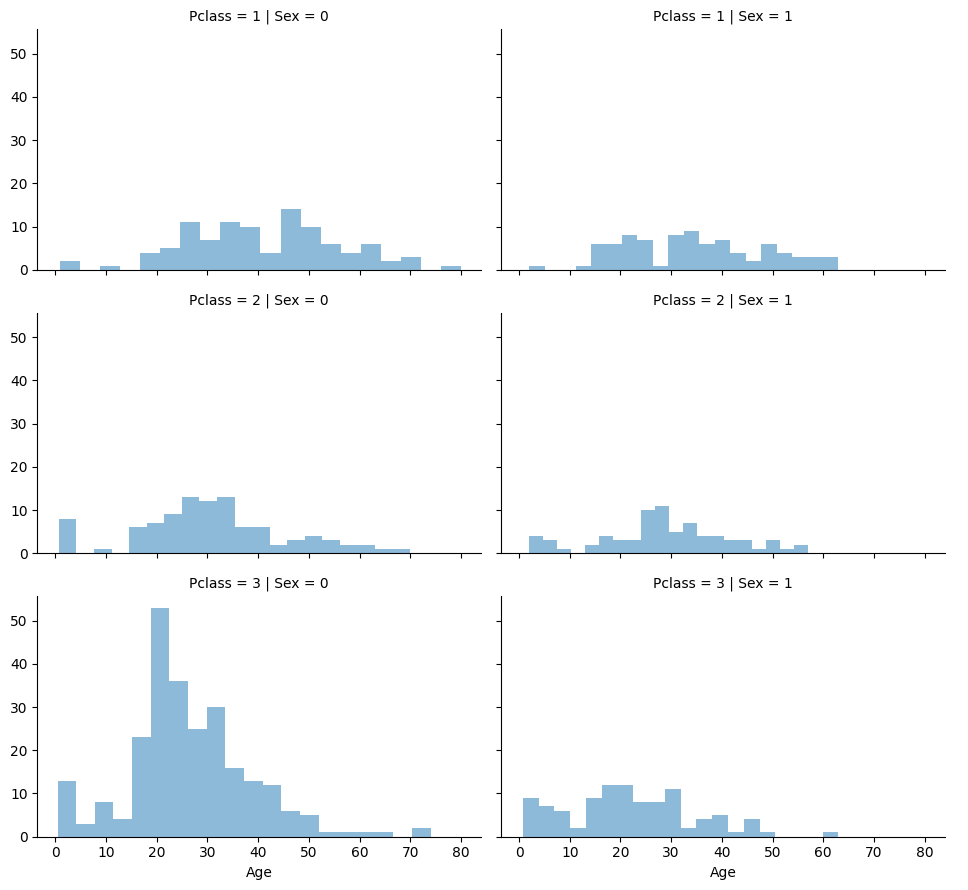

In [23]:
grid = sns.FacetGrid(train , col='Sex' , row='Pclass' , aspect=1.6)
grid.map(plt.hist , 'Age' , alpha=.5 , bins=20)
grid.add_legend()

In [24]:
for dataset in combine:
    for i in range(0, 2):
        for j in range(0, 3):
            guess_df = dataset[(dataset['Sex'] == i) & (dataset['Pclass'] == j + 1)]['Age'].dropna()
            # Calculate the median age for the subgroup
            age_guess = guess_df.median()
            # Impute missing 'Age' values with the median for the subgroup
            dataset.loc[(dataset.Age.isnull()) & (dataset.Sex == i) & (dataset.Pclass == j + 1), 'Age'] = age_guess

# Convert 'Age' column to integers after imputation is complete
for dataset in combine:
    dataset['Age'] = dataset['Age'].astype(int)

train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22,1,0,7.2500,S,1
1,1,1,1,38,1,0,71.2833,C,3
2,1,3,1,26,0,0,7.9250,S,2
3,1,1,1,35,1,0,53.1000,S,3
4,0,3,0,35,0,0,8.0500,S,1


In [25]:
train['AgeBand'] = pd.cut(train['Age'] , 5)
train[['AgeBand' , 'Survived']].groupby(['AgeBand'] , as_index=False).mean().sort_values(by='AgeBand' , ascending=True)

<ipython-input-25-395d2b4e031d>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  train[['AgeBand' , 'Survived']].groupby(['AgeBand'] , as_index=False).mean().sort_values(by='AgeBand' , ascending=True)


,AgeBand,Survived
0,"(-0.08, 16.0]",0.550000
1,"(16.0, 32.0]",0.337374
2,"(32.0, 48.0]",0.412037
3,"(48.0, 64.0]",0.434783
4,"(64.0, 80.0]",0.090909


In [26]:
for dataset in combine:
  dataset.loc[dataset['Age'] <= 16 , 'Age'] = 0
  dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32) , 'Age'] = 1
  dataset.loc[(dataset['Age'] >= 32) & (dataset['Age'] <= 48) , 'Age'] = 2
  dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64) , 'Age'] = 3
  dataset.loc[(dataset['Age'] > 64 , 'Age')] = 4

train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeBand
0,0,3,0,1,1,0,7.2500,S,1,"(16.0, 32.0]"
1,1,1,1,2,1,0,71.2833,C,3,"(32.0, 48.0]"
2,1,3,1,1,0,0,7.9250,S,2,"(16.0, 32.0]"
3,1,1,1,2,1,0,53.1000,S,3,"(32.0, 48.0]"
4,0,3,0,2,0,0,8.0500,S,1,"(32.0, 48.0]"


In [27]:
for dataset in combine:
  dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

train[['FamilySize' , 'Survived']].groupby(['FamilySize'] , as_index=False).mean().sort_values(by='FamilySize')

,FamilySize,Survived
0,1,0.303538
1,2,0.552795
2,3,0.578431
3,4,0.724138
4,5,0.200000
5,6,0.136364
6,7,0.333333
7,8,0.000000
8,11,0.000000


In [28]:
for dataset in combine:
  dataset['IsAlone'] = 0
  dataset.loc[dataset['FamilySize'] == 1 , 'IsAlone'] = 1

train[['IsAlone' , 'Survived']].groupby(['IsAlone'] , as_index=False).mean()

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


In [29]:
train = train.drop(['Parch' , 'SibSp' , 'FamilySize'] , axis=1, errors='ignore')
test = test.drop(['Parch' , 'SibSp' , 'FamilySize'] , axis=1, errors='ignore')
combine = [train , test]

train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,AgeBand,IsAlone
0,0,3,0,1,7.2500,S,1,"(16.0, 32.0]",0
1,1,1,1,2,71.2833,C,3,"(32.0, 48.0]",0
2,1,3,1,1,7.9250,S,2,"(16.0, 32.0]",1
3,1,1,1,2,53.1000,S,3,"(32.0, 48.0]",0
4,0,3,0,2,8.0500,S,1,"(32.0, 48.0]",1


In [30]:
freq_port = train.Embarked.dropna().mode()[0]
for dataset in combine:
  dataset['Embarked'] = dataset['Embarked'].fillna(freq_port)

  #train[['Embarked' , 'Survived']].groupby(['Embarked'] , as_index=False).mean().sort_values(by='Survived' , ascending=False)

In [31]:
train[['Embarked' , 'Survived']].groupby(['Embarked'] , as_index=False).mean().sort_values(by='Survived' , ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


In [32]:
test['Fare'].fillna(test['Fare'].dropna().median() , inplace=True)
test.head()

<ipython-input-32-7c8752a20ea1>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test['Fare'].fillna(test['Fare'].dropna().median() , inplace=True)


,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,892,3,0,2,7.8292,Q,1,1
1,893,3,1,2,7.0000,S,3,0
2,894,2,0,3,9.6875,Q,1,1
3,895,3,0,1,8.6625,S,1,1
4,896,3,1,1,12.2875,S,3,0


In [33]:
for dataset in combine:
  dataset.loc[dataset['Fare'] <= 7.91, 'Fare'] = 0
  dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.54), 'Fare'] = 1
  dataset.loc[(dataset['Fare'] > 14.54) & (dataset['Fare'] <= 31), 'Fare']   = 2
  dataset.loc[dataset['Fare'] > 31, 'Fare'] = 3
  dataset['Fare'] = dataset['Fare'].astype(int)

train.head(12)

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,AgeBand,IsAlone
0,0,3,0,1,0,S,1,"(16.0, 32.0]",0
1,1,1,1,2,3,C,3,"(32.0, 48.0]",0
2,1,3,1,1,1,S,2,"(16.0, 32.0]",1
3,1,1,1,2,3,S,3,"(32.0, 48.0]",0
4,0,3,0,2,1,S,1,"(32.0, 48.0]",1
5,0,3,0,1,1,Q,1,"(16.0, 32.0]",1
6,0,1,0,3,3,S,1,"(48.0, 64.0]",1
7,0,3,0,0,2,S,4,"(-0.08, 16.0]",0
8,1,3,1,1,1,S,3,"(16.0, 32.0]",0
9,1,2,1,0,2,C,3,"(-0.08, 16.0]",0


In [37]:
# Model Deployment Pipeline
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, classification_report
import joblib
import pandas as pd
from sklearn.preprocessing import LabelEncoder


# 1. Prepare Final Feature Set (align with EDA transformations)
X = train.drop('Survived', axis=1)
y = train['Survived']

# Convert 'Embarked' and 'AgeBand' to numerical representations
# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Fit and transform the 'Embarked' column
X['Embarked'] = label_encoder.fit_transform(X['Embarked'])

# If 'AgeBand' exists in the DataFrame
if 'AgeBand' in X.columns:
    # Convert 'AgeBand' to numerical labels
    X['AgeBand'] = label_encoder.fit_transform(X['AgeBand'].astype(str)) # astype(str) is needed if AgeBand is an Interval type


Test Accuracy: 81.01%

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.87      0.85       110
           1       0.78      0.71      0.74        69

    accuracy                           0.81       179
   macro avg       0.80      0.79      0.80       179
weighted avg       0.81      0.81      0.81       179

Cross-Validated Accuracy: 81.83% (±4.98%)


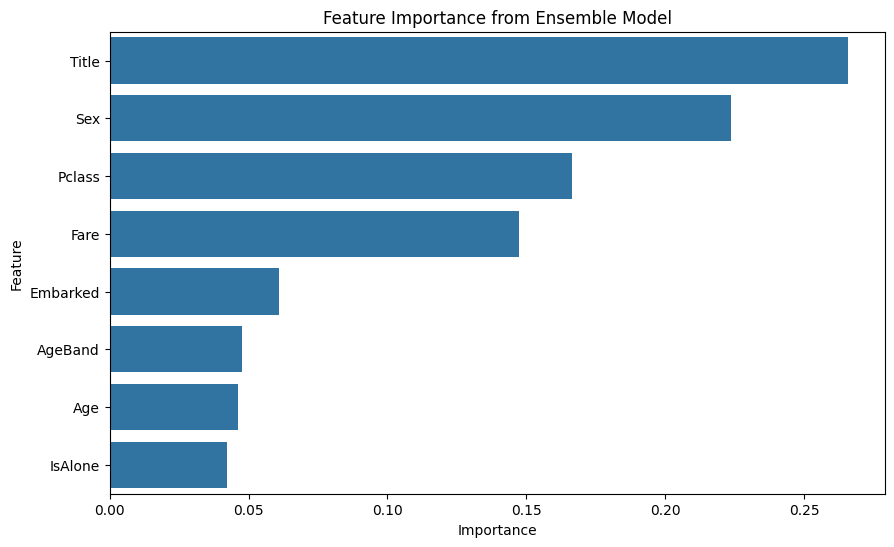

['titanic_survival_ensemble.pkl']

In [40]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score

# 2. Ensemble Model Configuration
best_models = [
    ('rf', RandomForestClassifier(
        n_estimators=500,
        max_depth=8,
        min_samples_split=6,
        random_state=42,
        class_weight='balanced')),

    ('xgb', XGBClassifier(
        learning_rate=0.05,
        max_depth=5,
        subsample=0.8,
        colsample_bytree=0.8,
        use_label_encoder=False,
        eval_metric='logloss'))
]

ensemble = VotingClassifier(
    estimators=best_models,
    voting='soft',
    n_jobs=-1)

# 3. Hyperparameter Optimization
param_grid = {
    'rf__max_depth': [6, 8, 10],
    'xgb__learning_rate': [0.01, 0.05, 0.1],
    'voting': ['soft', 'hard']
}

grid_search = GridSearchCV(
    estimator=ensemble,
    param_grid=param_grid,
    cv=StratifiedKFold(n_splits=5),
    scoring='accuracy',
    n_jobs=-1)

grid_search.fit(X, y)

# 4. Final Model Training
best_model = grid_search.best_estimator_
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42)

best_model.fit(X_train, y_train)

# 5. Model Evaluation
y_pred = best_model.predict(X_test)
print(f"Test Accuracy: {accuracy_score(y_test, y_pred):.2%}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# 6. Cross-Validation Score
cv = StratifiedKFold(n_splits=10)
cv_scores = cross_val_score(best_model, X, y,
                          cv=cv,
                          scoring='accuracy',
                          n_jobs=-1)
print(f"Cross-Validated Accuracy: {cv_scores.mean():.2%} (±{cv_scores.std():.2%})")

# 7. Feature Importance Analysis
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': best_model.named_estimators_['rf'].feature_importances_
}).sort_values('Importance', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Feature Importance from Ensemble Model')
plt.show()

# 8. Model Persistence
joblib.dump(best_model, 'titanic_survival_ensemble.pkl')
